<a href="https://colab.research.google.com/github/MYVirajani/Assignment_02_Computer_Vision_and_Image_Processing/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

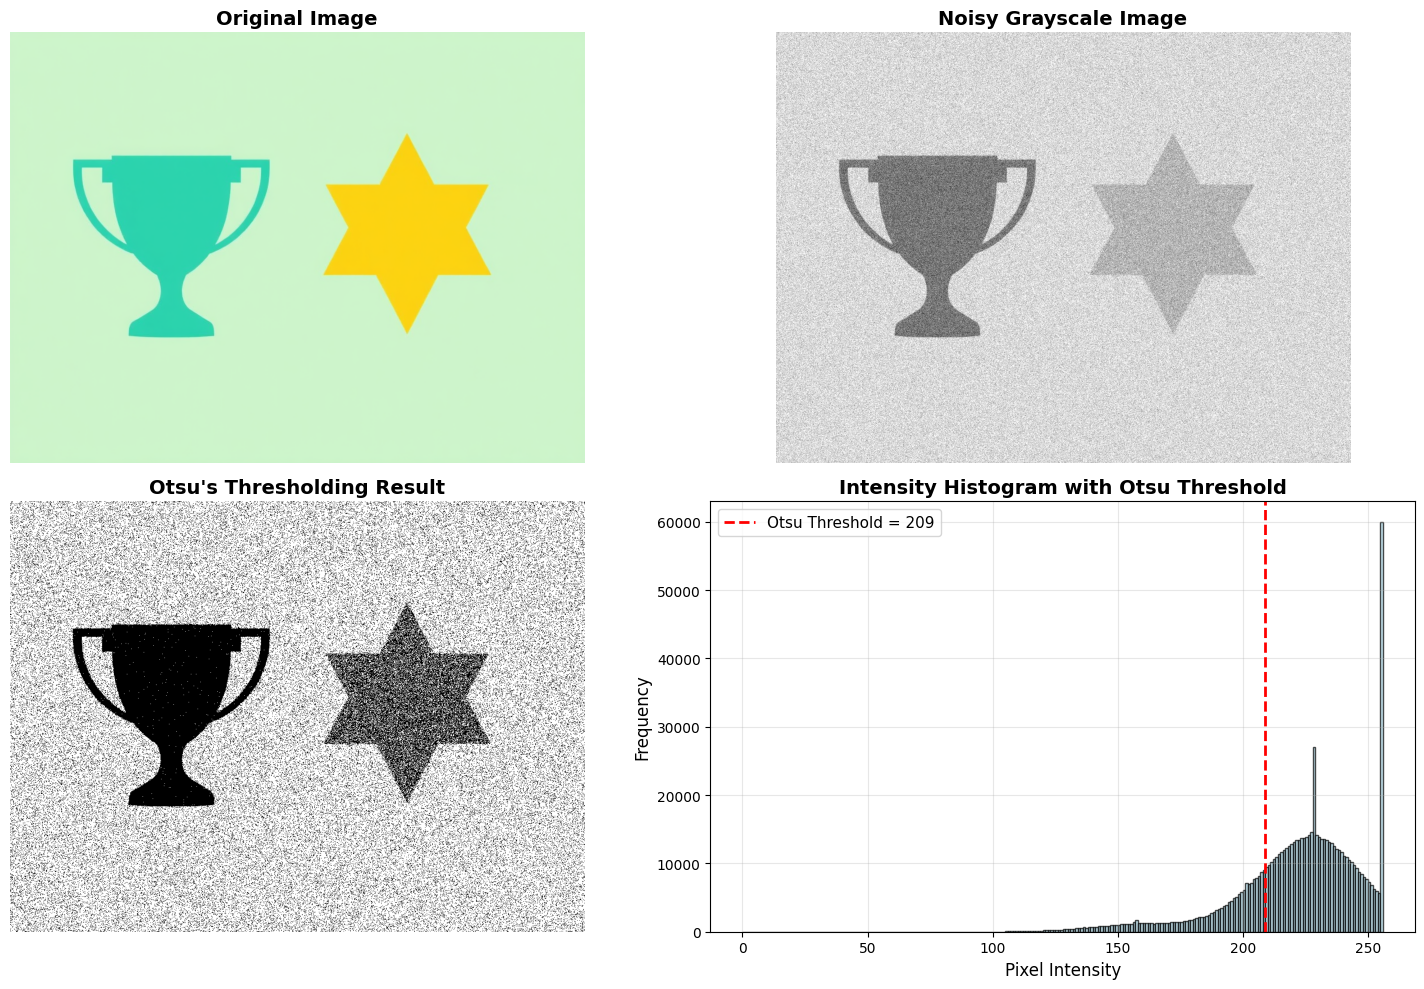

TASK 01 - OTSU'S AUTOMATIC THRESHOLDING & NOISE HANDLING
✓ Otsu's optimal threshold: 209
✓ Image dimensions: (768, 1024, 3)
✓ Total pixels: 786432
✓ Output saved as: task01_output.png


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and validate input image
input_image = cv2.imread("task01_input_image.png")
if input_image is None:
     raise FileNotFoundError("Error: Could not load 'task01_input_image.png'. Please check if the file exists.")

# Convert BGR to RGB for proper matplotlib display
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

def apply_gaussian_noise(image, mean=0, sigma=20):
    """
    Add Gaussian noise to an image.

    Args:
        image: Input grayscale image
        mean: Mean of the Gaussian distribution (default: 0)
        sigma: Standard deviation of the Gaussian distribution (default: 20)

    Returns:
        Noisy image with added Gaussian noise
    """
    noise = np.random.normal(mean, sigma, image.shape).astype(np.int16)
    noisy_image = image.astype(np.int16) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Add Gaussian noise to the grayscale image
noisy_grayscale = apply_gaussian_noise(grayscale_image)

def otsu_threshold(image):
    """
    Implement Otsu's automatic thresholding algorithm.

    Args:
        image: Input grayscale image

    Returns:
        tuple: (optimal_threshold, binary_image)
    """
    # Calculate histogram
    histogram, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size
    sum_total = np.dot(np.arange(256), histogram)

    # Initialize variables for Otsu's method
    sum_background = 0
    weight_background = 0
    max_variance = 0
    optimal_threshold = 0

    # Iterate through all possible threshold values
    for threshold in range(256):
        weight_background += histogram[threshold]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += threshold * histogram[threshold]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Calculate between-class variance
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Update optimal threshold if current variance is maximum
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            optimal_threshold = threshold

    # Apply thresholding to create binary image
    binary_image = (image >= optimal_threshold).astype(np.uint8) * 255
    return optimal_threshold, binary_image

# Apply Otsu's thresholding
threshold_value, binary_result = otsu_threshold(noisy_grayscale)

# Create visualization
plt.figure(figsize=(15, 10))

# Original RGB image
plt.subplot(2, 2, 1)
plt.title("Original Image", fontsize=14, fontweight='bold')
plt.imshow(input_image_rgb)
plt.axis('off')

# Noisy grayscale image
plt.subplot(2, 2, 2)
plt.title("Noisy Grayscale Image", fontsize=14, fontweight='bold')
plt.imshow(noisy_grayscale, cmap='gray')
plt.axis('off')

# Binary result from Otsu's thresholding
plt.subplot(2, 2, 3)
plt.title("Otsu's Thresholding Result", fontsize=14, fontweight='bold')
plt.imshow(binary_result, cmap='gray')
plt.axis('off')

# Histogram with threshold line
plt.subplot(2, 2, 4)
plt.title("Intensity Histogram with Otsu Threshold", fontsize=14, fontweight='bold')
plt.hist(noisy_grayscale.ravel(), bins=256, range=(0, 256), color='lightblue', alpha=0.7, edgecolor='black')
plt.axvline(x=threshold_value, color='red', linestyle='--', linewidth=2,
           label=f'Otsu Threshold = {threshold_value}')
plt.xlabel("Pixel Intensity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("task01_output.png", dpi=300, bbox_inches='tight')
plt.show()

# Print results
print("="*55)
print("TASK 01 - OTSU'S AUTOMATIC THRESHOLDING & NOISE HANDLING")
print("="*55)
print(f"✓ Otsu's optimal threshold: {threshold_value}")
print(f"✓ Image dimensions: {input_image.shape}")
print(f"✓ Total pixels: {grayscale_image.size}")
print(f"✓ Output saved as: task01_output.png")
print("="*55)

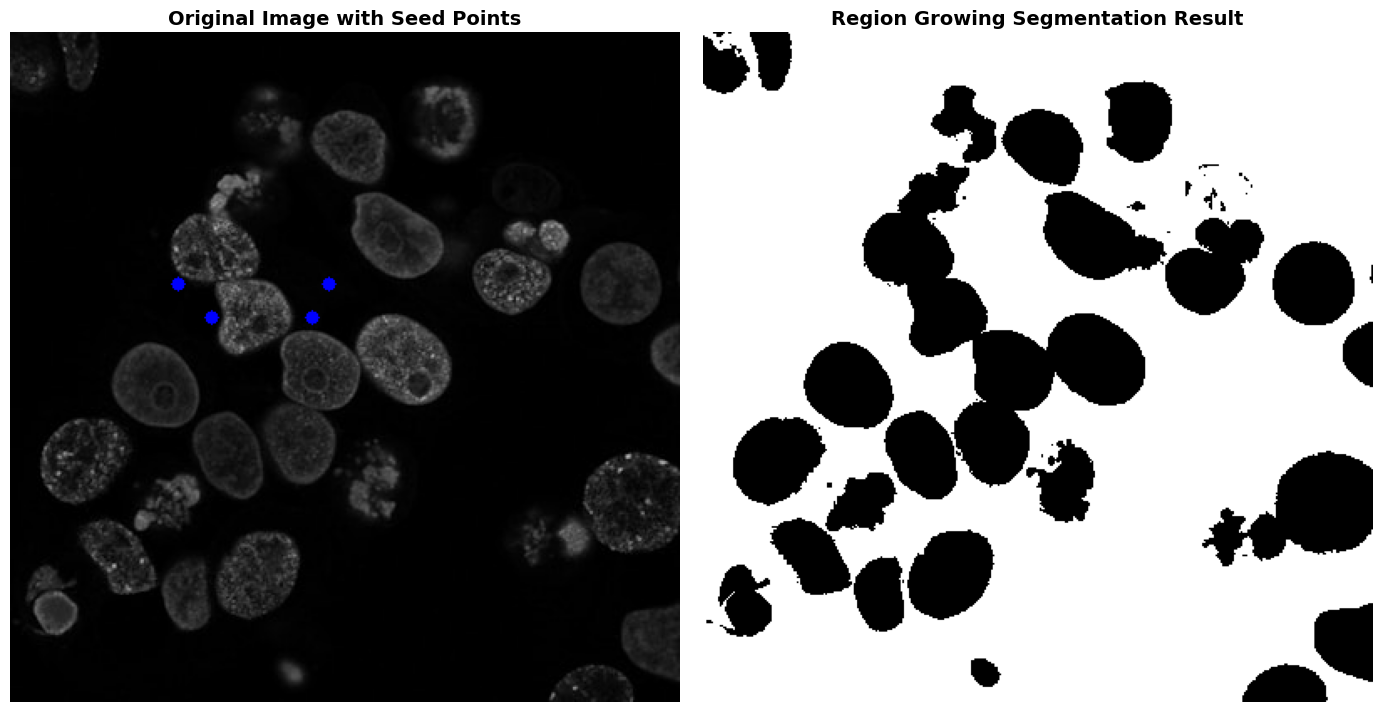

TASK 02 - REGION GROWING SEGMENTATION RESULTS
✓ Input image size: 400x400 pixels
✓ Number of seed points: 4
✓ Seed coordinates: [(100, 150), (120, 170), (180, 170), (190, 150)]
✓ Intensity threshold used: 10
✓ Segmented pixels: 117,076
✓ Segmentation percentage: 73.17%
✓ Output saved as: task02_output.png


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_region_growing(img, seed_points, intensity_threshold=5):
    """
    Performs region growing segmentation on a grayscale image.

    Parameters:
        img: Input grayscale image
        seed_points: List of (x, y) coordinates for seed points
        intensity_threshold: Maximum intensity difference for region inclusion

    Returns:
        Binary segmented image (255 for region, 0 for background)
    """
    img_height, img_width = img.shape
    segmented_region = np.zeros_like(img, dtype=np.uint8)
    pixel_visited = np.zeros_like(img, dtype=bool)

    # Initialize processing queue with seed points
    processing_queue = list(seed_points)

    # Calculate mean intensity of seed points
    seed_intensities = [img[y, x] for x, y in seed_points]
    reference_intensity = np.mean(seed_intensities)

    # Process pixels using breadth-first search
    while processing_queue:
        current_x, current_y = processing_queue.pop(0)

        # Skip if already visited
        if pixel_visited[current_y, current_x]:
            continue

        pixel_visited[current_y, current_x] = True
        current_intensity = img[current_y, current_x]

        # Check if pixel belongs to the region
        if abs(int(current_intensity) - int(reference_intensity)) <= intensity_threshold:
            segmented_region[current_y, current_x] = 255

            # Add 8-connected neighbors to queue
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    if dx == 0 and dy == 0:  # Skip center pixel
                        continue

                    neighbor_x, neighbor_y = current_x + dx, current_y + dy

                    # Check bounds and visited status
                    if (0 <= neighbor_x < img_width and
                        0 <= neighbor_y < img_height and
                        not pixel_visited[neighbor_y, neighbor_x]):
                        processing_queue.append((neighbor_x, neighbor_y))

    return segmented_region

def mark_seed_points(img, seeds, marker_color=(255, 0, 0), marker_size=4):
    """
    Marks seed points on an image with colored circles.

    Parameters:
        img: Input grayscale image
        seeds: List of (x, y) seed coordinates
        marker_color: BGR color tuple for markers
        marker_size: Radius of marker circles

    Returns:
        Color image with marked seed points
    """
    marked_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for x, y in seeds:
        cv2.circle(marked_img, (x, y), radius=marker_size,
                  color=marker_color, thickness=-1)

    return marked_img

# Load input image
input_img = cv2.imread("task02_input_image.jpeg", cv2.IMREAD_GRAYSCALE)
if input_img is None:
    raise FileNotFoundError("Error: Could not load 'task02_input_image.jpeg'. Please verify the file exists.")

# Define seed points for region growing
seed_coordinates = [(100, 150), (120, 170), (180, 170), (190, 150)]

# Apply region growing segmentation
segmentation_result = segment_region_growing(input_img, seed_coordinates, intensity_threshold=10)

# Create visualization with marked seed points
img_with_seeds = mark_seed_points(input_img, seed_coordinates)

# Display results
plt.figure(figsize=(14, 7))

# Original image with seed points
plt.subplot(1, 2, 1)
plt.title("Original Image with Seed Points", fontsize=14, fontweight='bold')
plt.imshow(cv2.cvtColor(img_with_seeds, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Region growing segmentation result
plt.subplot(1, 2, 2)
plt.title("Region Growing Segmentation Result", fontsize=14, fontweight='bold')
plt.imshow(segmentation_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig("task02_output.png", dpi=300, bbox_inches='tight')
plt.show()

# Display results summary
print("="*55)
print("TASK 02 - REGION GROWING SEGMENTATION RESULTS")
print("="*55)
print(f"✓ Input image size: {input_img.shape[1]}x{input_img.shape[0]} pixels")
print(f"✓ Number of seed points: {len(seed_coordinates)}")
print(f"✓ Seed coordinates: {seed_coordinates}")
print(f"✓ Intensity threshold used: 10")
print(f"✓ Segmented pixels: {np.sum(segmentation_result == 255):,}")
print(f"✓ Segmentation percentage: {(np.sum(segmentation_result == 255) / input_img.size * 100):.2f}%")
print(f"✓ Output saved as: task02_output.png")
print("="*55)
